In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize, Text, WordNetLemmatizer
import string

In [2]:
data = pd.read_csv("most_popular_films.csv")
data.head()

,id,name,year,avg_stars,stars,review
0,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,Borat Make a *Glorious* #2! Subsequent Moviefi...
1,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,My husband loved SCB in all his incarnations (...
2,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,"What's even funnier than the movie itself, is ..."
3,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,For those saying Giuliani was just tucking in ...
4,tt13143964,Borat Subsequent Moviefilm: Delivery of Prodig...,2020,6.9,10,Nothing more needs to be said than: LOOK at th...


In [3]:
data.dtypes

id            object
name          object
year           int64
avg_stars    float64
stars          int64
review        object
dtype: object

In [4]:
data.describe()

,year,avg_stars,stars
count,97191.000000,97191.000000,97191.000000
mean,2011.519945,7.648518,7.319237
std,13.584515,1.292380,3.092264
min,1940.000000,2.800000,1.000000
25%,2008.000000,7.100000,5.000000
50%,2019.000000,7.800000,9.000000
75%,2019.000000,8.500000,10.000000
max,2020.000000,9.300000,10.000000


In [5]:
a=''.join(data.loc[data['id']=='tt13143964'].review.values.tolist())

In [6]:

english_vocab = set(w.lower() for w in nltk.corpus.words.words())
stop_words = set(nltk.corpus.stopwords.words("english"))
wnl = WordNetLemmatizer()


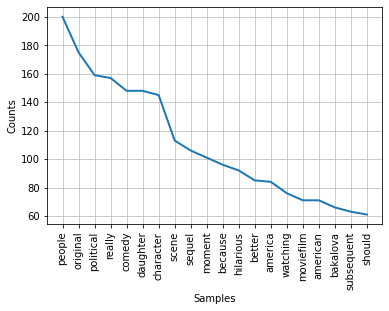

In [7]:
tokens = word_tokenize(a)
longword = [wnl.lemmatize(w).lower() for w in tokens if len(w)>5]
nltk.FreqDist(longword).plot(20)

In [8]:
allReview=' '.join(data.review.values.tolist())
allReview_tokens = word_tokenize(allReview)

In [9]:
allTokens=[wnl.lemmatize(w).lower() for w in allReview_tokens if len(w)>5]
len(allTokens)

3147140

## the freqdist of word longer than 5

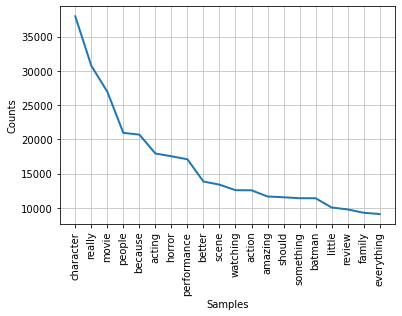

In [10]:
nltk.FreqDist(allTokens).plot(20)

In [11]:
allTokens=[wnl.lemmatize(w).lower() for w in allReview_tokens if len(w)>8]
len(allTokens)

943566

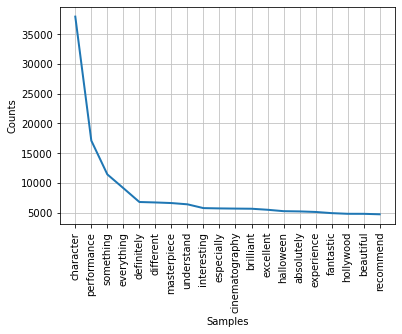

In [12]:
nltk.FreqDist(allTokens).plot(20)

In [13]:
review_pos=nltk.pos_tag(allReview_tokens, tagset='universal')

In [14]:
review_POS=nltk.FreqDist([pos for _,pos in review_pos])

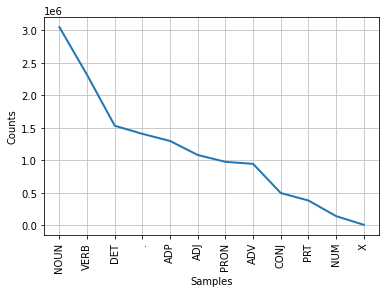

In [15]:
review_POS.plot()

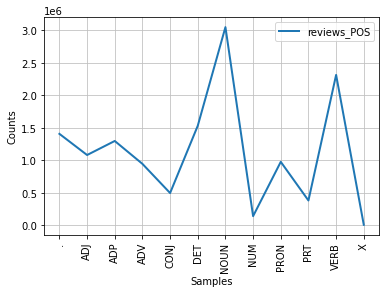

In [16]:
cfd = nltk.ConditionalFreqDist()
cfd['reviews_POS'] = review_POS
cfd.plot()

In [17]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

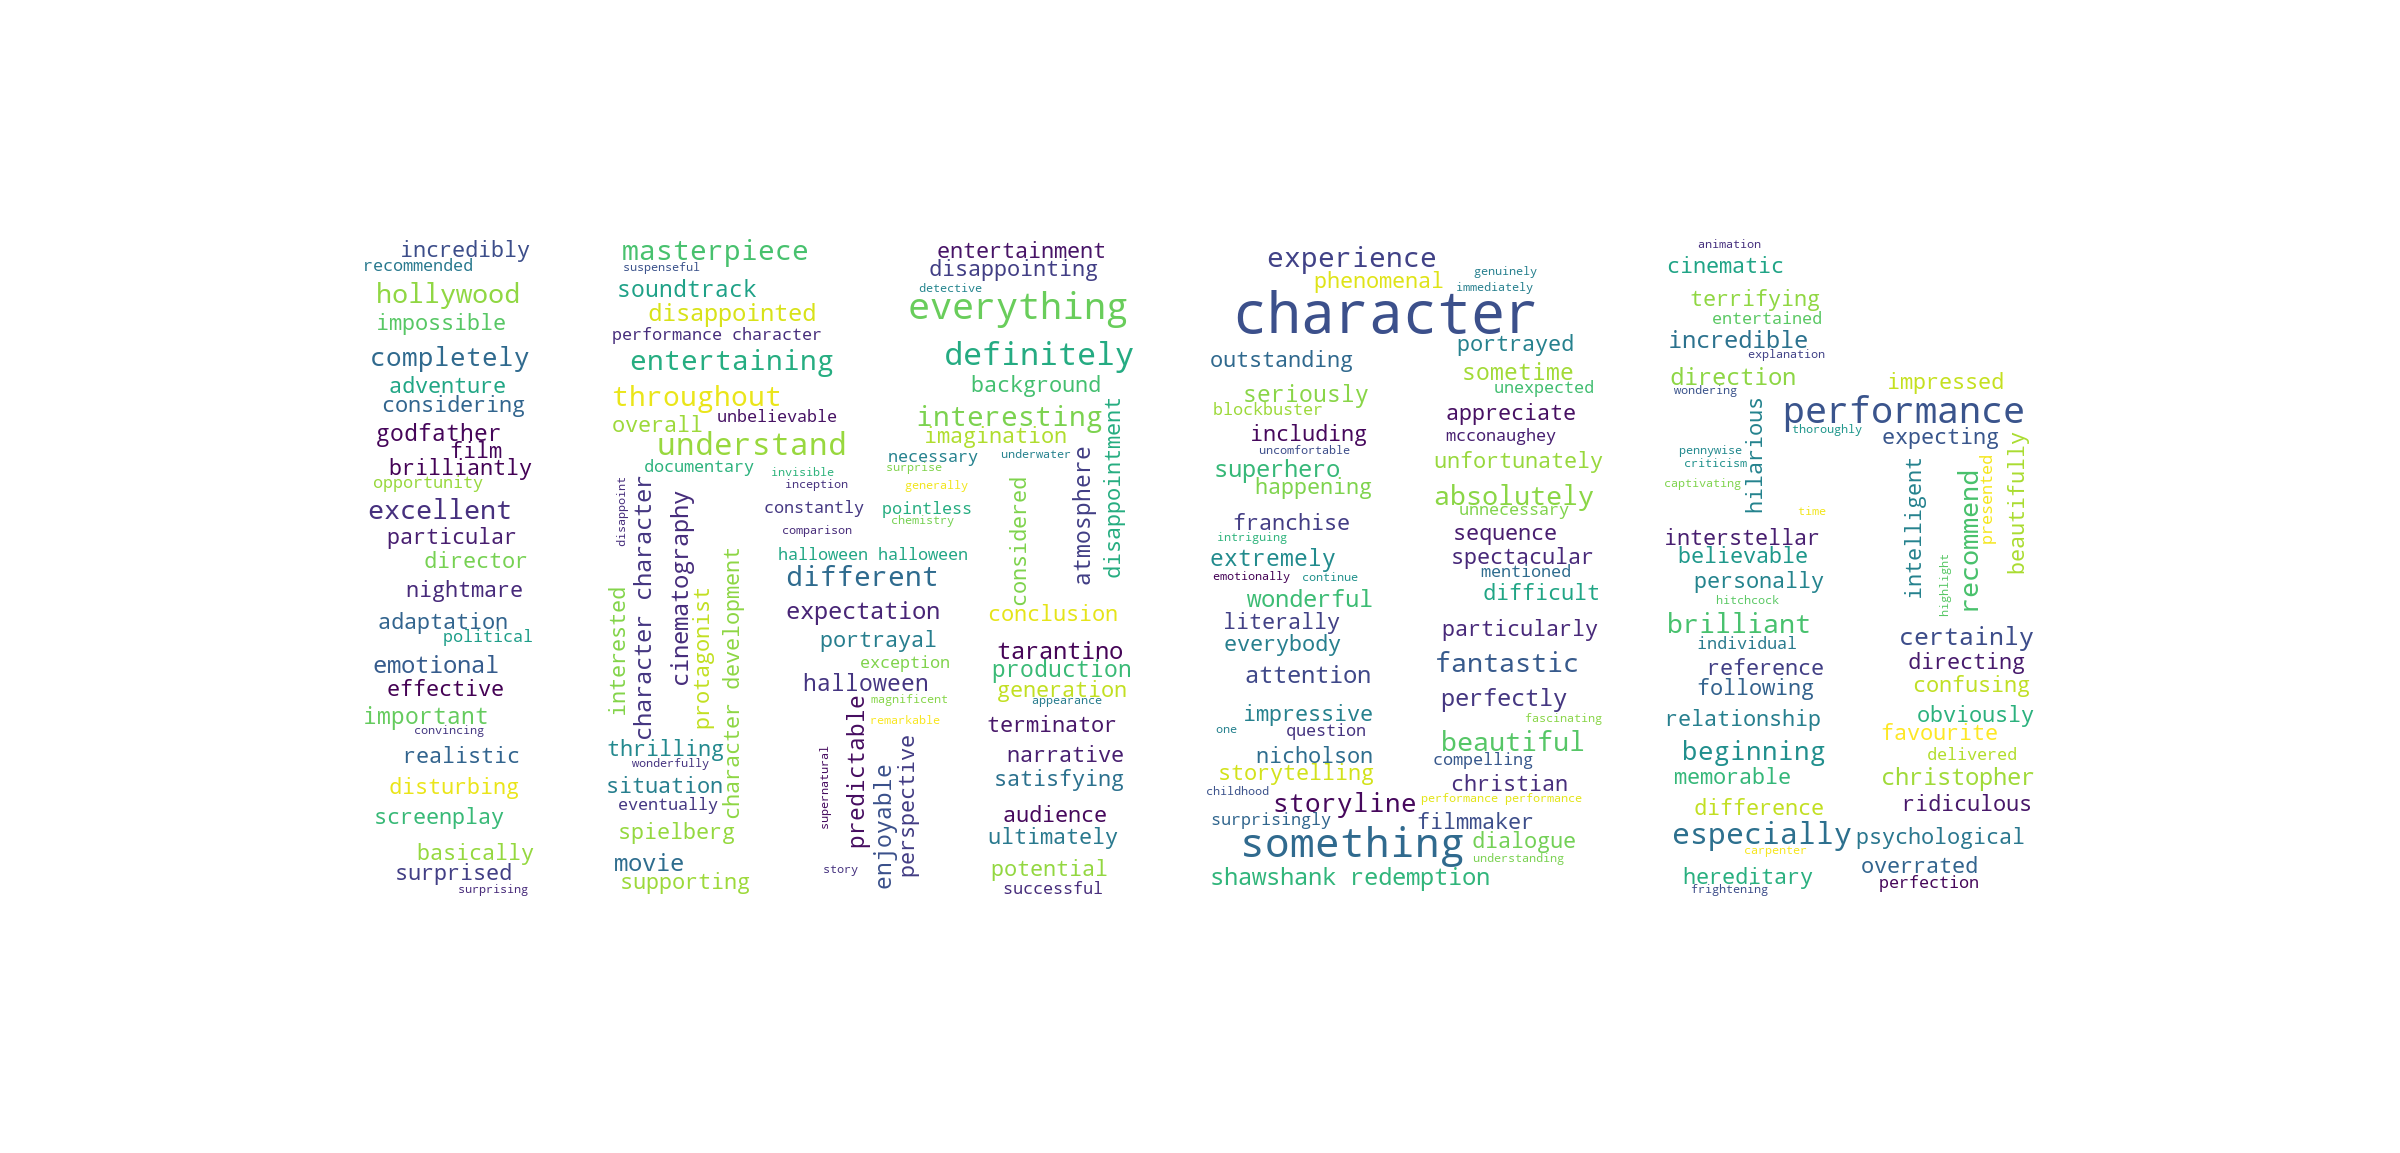

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
backgroud_Image = plt.imread('imdb_logo.jpg')
wc = WordCloud(background_color='white',mask=backgroud_Image)
wc.generate(' '.join(allTokens))
wc.to_image()

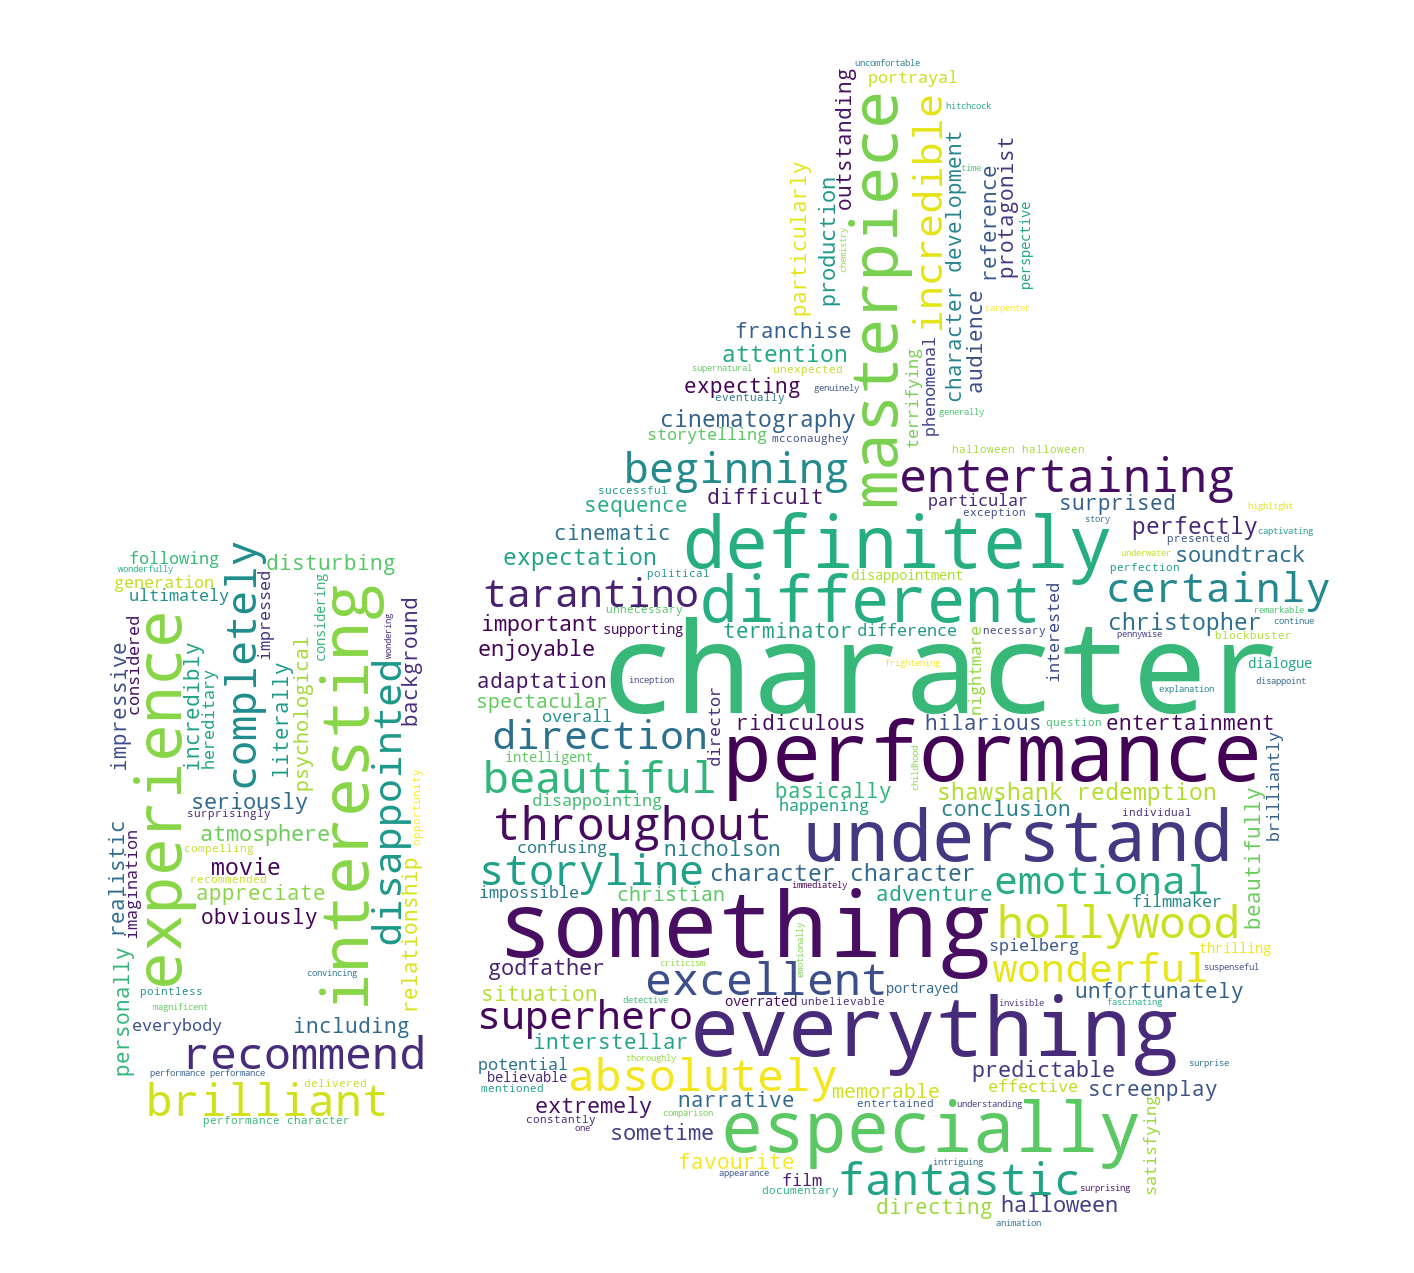

In [19]:
backgroud_Image = plt.imread('thumbup.jpg')
wc = WordCloud(background_color='white',mask=backgroud_Image)
wc.generate(' '.join(allTokens))
wc.to_image()

### positive review and negative review

In [20]:
data.stars = data.stars.astype(int)

In [21]:
pos_reviews = data[data.stars>=7]

In [22]:
neg_reviews = data[data.stars<=5]

In [23]:
pos_str =' '.join(pos_reviews.review.values.tolist())
neg_str =' '.join(neg_reviews.review.values.tolist())

In [24]:
pos_tokens = word_tokenize(pos_str)
neg_tokens = word_tokenize(neg_str)

In [25]:
pos_filtered=[wnl.lemmatize(w).lower() for w in pos_tokens if w in english_vocab and w not in stop_words and len(w)>5]
neg_filtered=[wnl.lemmatize(w).lower() for w in neg_tokens if w in english_vocab and w not in stop_words and len(w)>5]

In [26]:
pos_freqdist = nltk.FreqDist(pos_filtered)
neg_freqdist = nltk.FreqDist(neg_filtered)

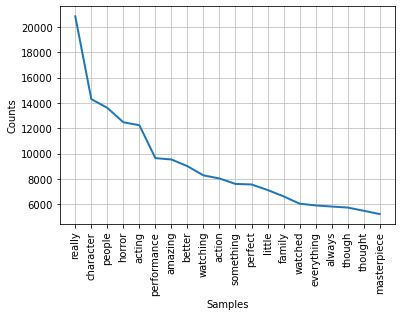

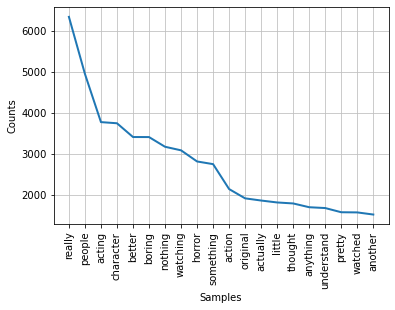

In [27]:
pos_freqdist.plot(20)
neg_freqdist.plot(20)

In [28]:
pos_bigram=nltk.bigrams(pos_filtered)
neg_bigram=nltk.bigrams(neg_filtered)


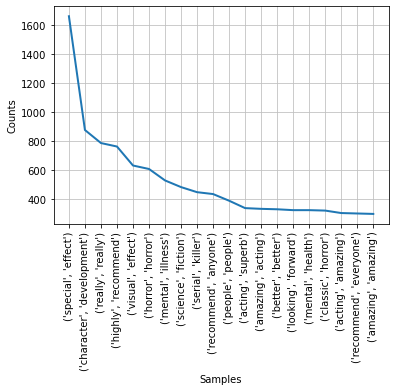

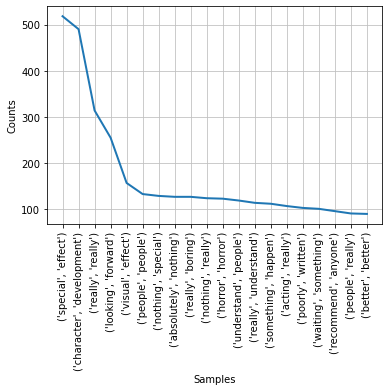

In [29]:
nltk.FreqDist(pos_bigram).plot(20)
nltk.FreqDist(neg_bigram).plot(20)

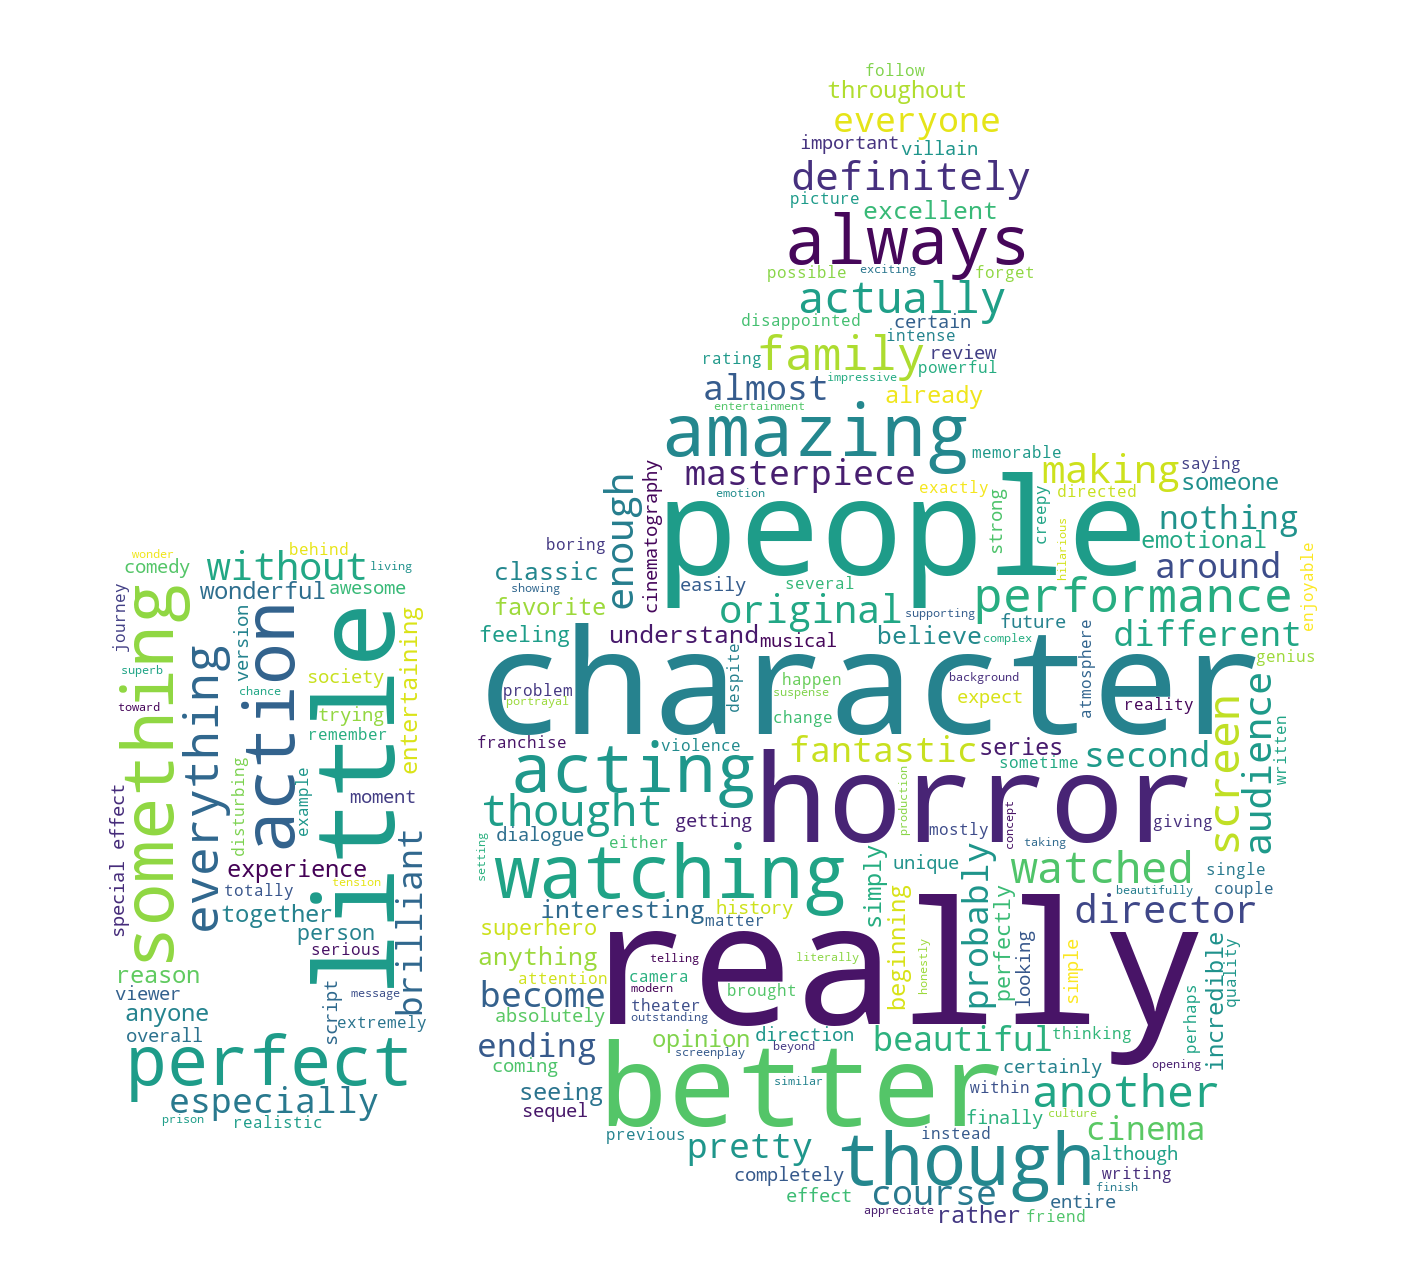

In [30]:
backgroud_Image = plt.imread('thumbup.jpg')
wc = WordCloud(background_color='white',mask=backgroud_Image)
wc.generate(' '.join(pos_filtered))
wc.to_image()

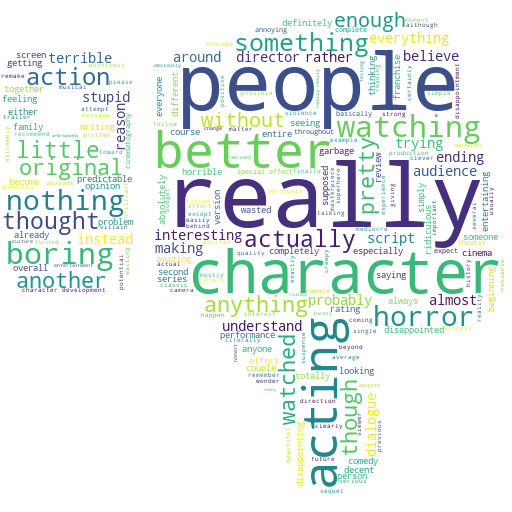

In [31]:
backgroud_Image = plt.imread('thumbdown.jpg')
wc = WordCloud(background_color='white',mask=backgroud_Image)
wc.generate(' '.join(neg_filtered))
wc.to_image()